## Setup
1. Upgrade ipykernel
2. Restart the runtime
3. Install the Azure IOT Device package
2. Restart the runtime

In [ ]:
%pip install ipython ipykernel --upgrade

In [ ]:
%pip install azure-iot-device

# IOT Hub Overview
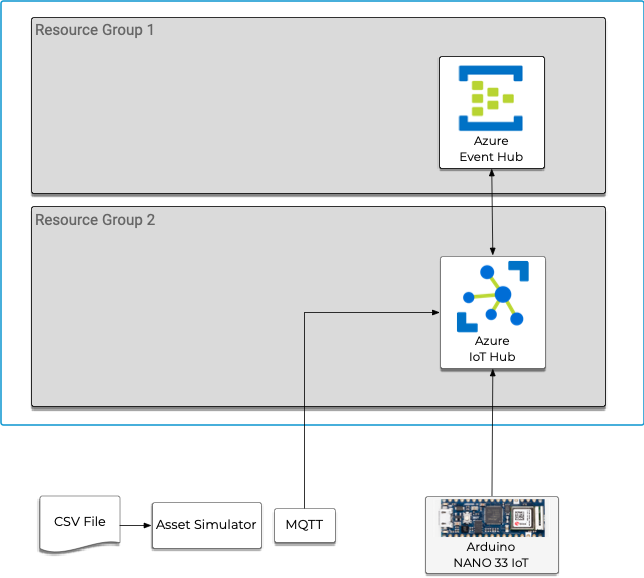

In [ ]:
import asyncio
from azure.iot.device.aio import IoTHubDeviceClient
import json
from time import sleep
from datetime import datetime

# In a live environment, these should be loaded from an environment variable, not code
CONN_STR_202801='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202801;SharedAccessKey=pPF17FGhUppzSUsRfqv7l2AqIlD4bRW6ETpJoStCdqQ='
CONN_STR_202802='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202802;SharedAccessKey=HQLVeRtvk8SpC8RAs9PCPjlS2NeIW/PtsgPcFGtbmEI='
CONN_STR_202803='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202803;SharedAccessKey=OkXX/zHUAxmfhnVSItC0hu194YReli8qzGtmHm/C0Zo='
CONN_STR_202804='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202804;SharedAccessKey=ncDxzTv5H9LKPxVHdfyXY1Z/lmhS/CyBe26w7ew8n3c='
CONN_STR_202805='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202805;SharedAccessKey=ufHadvYUcDV4HLAId+nfCOOE6m4WbQaYAcuBPkxUBx4='
CONN_STR_202806='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202806;SharedAccessKey=3LYXJ5O6UJcLfeLQHSoEaB/NEr1GCEMoj+/RnyVYY1U='
CONN_STR_202807='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202807;SharedAccessKey=2rsZOFPBk8DXzppatxRSKWJmltP9AlY1ddBOB6r9QN0='
CONN_STR_202808='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202808;SharedAccessKey=KdQ0Jwu62IeXr5BtHeX/n++m2wVuvwZ4OmNfB/QhVfA='
CONN_STR_202809='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202809;SharedAccessKey=zTM/Er4XM9w/goPzHXdXJ1KDjrbjEEGXZ67ZiQ1alxQ='
CONN_STR_202810='HostName=sim-riot-iothub.azure-devices.net;DeviceId=202810;SharedAccessKey=pKFIqxdMK9lqRS2UCOOWdNo/mNEtfyKmw0edCtg/2DU='

### Instructions: Configure your device information
1. Replace ```CONN_STR_202801``` with the connection string for your device ID


In [ ]:
MY_DEVICE_ID = '202801'
MY_CONNECTION_STRING = CONN_STR_202801

In [ ]:
# Utilities
def SAS_now_string():
    return( datetime.now().strftime("%b %d, %Y %I:%M:%S %p") )

In [ ]:
# Define a basic simulator class
class deviceSimulator:
    _conn_str = None
    _device_client = None
    _device_ID = None
    
    def __init__(self, conn_str, device_ID):
        self._conn_str = conn_str
        self._device_ID = device_ID
        
    async def connect(self):
        if self._conn_str is not None:
            self._device_client = IoTHubDeviceClient.create_from_connection_string(self._conn_str)
        await self._device_client.connect()
            
            
    async def send_message(self, msg):
        print(msg)
        await self._device_client.send_message(msg)
   
                                               
    async def disconnect(self):
        await self._device_client.disconnect()
           
    

## Create a Simulator and Send Four Messages

In [ ]:
# Create a device simulator
test_id = MY_DEVICE_ID
test_sim = deviceSimulator(MY_CONNECTION_STRING, test_id)

# Connect to the IoT Hub
await test_sim.connect()

# Send a few test messages
for i in range(0, 4,1):
    val4 = round((i/50)+0.387104, 5)
    val5 = round(-0.145001 + (i/1000), 5)
    val6 = round(0.09452 - (i/100), 5)
    val3 = 85 + i
    message = json.dumps({"telemetryDataList" :[
        {"devId" : test_id, "varId" : "3", "value" : val3,"dateTime" : SAS_now_string()},
        {"devId" : test_id, "varId" : "4", "value" : val4,"dateTime" : SAS_now_string()},
        {"devId" : test_id, "varId" : "5", "value" : val5,"dateTime" : SAS_now_string()},
        {"devId" : test_id, "varId" : "6", "value" : val6,"dateTime" : SAS_now_string()}
    ]})
    await test_sim.send_message(message)
    sleep(1)

# When done, disconnect and release resources
await test_sim.disconnect()

## Simple Function Example from Microsoft



In [ ]:

async def run_device(my_connection_string):
    # Fetch the connection string from an environment variable
    #conn_str = os.getenv("IOTHUB_DEVICE_CONNECTION_STRING")
    
    # Create instance of the device client using the authentication provider
    device_client = IoTHubDeviceClient.create_from_connection_string(my_connection_string)

    # Connect the device client.
    await device_client.connect()

    # Send a single message
    
    print("Sending message...", 1)
    await device_client.send_message("This is a message that is being sent")
    print("Message successfully sent!")

    # finally, shut down the client
    await device_client.shutdown()

await run_device(MY_CONNECTION_STRING)